<a href="https://colab.research.google.com/github/aiaaee/Clustering-Methods-Evaluation/blob/main/clustering_algorithms_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.datasets import make_blobs
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation , MeanShift , SpectralClustering , AgglomerativeClustering , DBSCAN , OPTICS

In [2]:
centers = [(-5, -5), (0, 0), (5, 5)]
X , Y = make_blobs(n_samples=200 , centers=centers)

In [3]:
X[0] , Y[0]

(array([5.11357859, 5.63309821]), np.int64(2))

In [4]:
x = X[: , 0]
y = X[: , 1]
fig = go.Figure(go.Scatter(x=x , y=y, mode='markers' , marker=dict(color=Y) ))
fig.update_layout(title='Scatter plot for Blobs ')
fig.show()

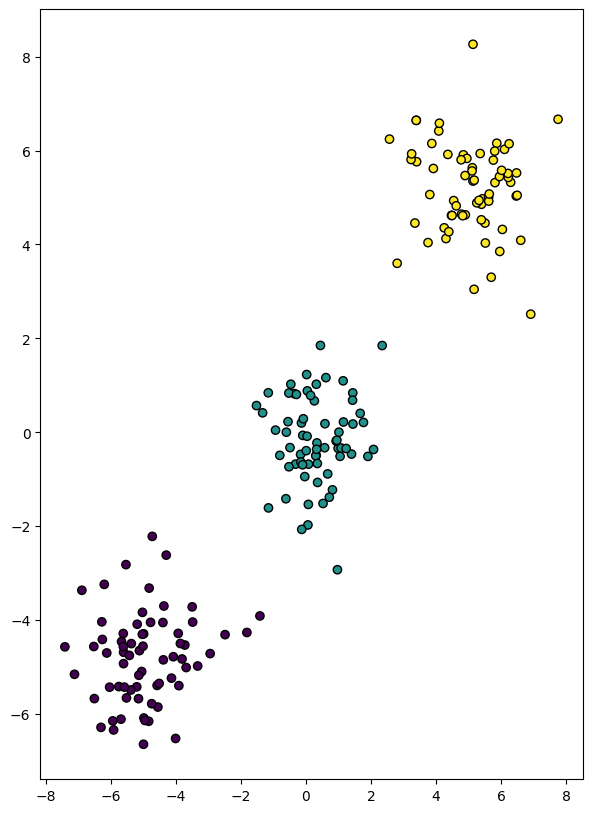

In [5]:
plt.figure(figsize=(7 , 10))
plt.scatter(x , y  , c=Y , cmap='viridis' , marker='o' , edgecolors='k' )

### Plotting the dataset

In [6]:
fig = go.Figure(go.Histogram2dContour(
    x=x, y=y, colorscale="Viridis", contours=dict(showlines=False)))
fig.add_trace(go.Scatter(x=x, y=y, mode="markers", opacity=0.5))
fig.update_layout(title="Density of Make blob dataset")
fig.show()

In [7]:
fig = px.density_heatmap(x=x, y=y, nbinsx=20, nbinsy=20, color_continuous_scale="Viridis")
fig.update_layout(title="2D Density Heatmap of Blobs")
fig.show()

In [8]:
fig = px.density_contour(x=X[:,0], y=X[:,1], nbinsx=30, nbinsy=30 , color=Y , marginal_x ='box' , labels=Y , marginal_y='violin' , trendline_color_override='plasma' )
fig.update_layout(title="Density Contour of Blobs")
fig.show()

### Affinity Propagation

In [9]:
affinity_propagation = AffinityPropagation(damping=0.7 , convergence_iter=20 , max_iter=600 , random_state=42)
affinity_propagation.fit(X)
affinity_propagation_labels = affinity_propagation.predict(X)

In [10]:
fig = go.Figure(data=go.Scatter(x=x,y=y , mode='markers' , marker=dict(color=affinity_propagation_labels , size=5)))
fig.update_layout(title='Make_blob dataset with Affinity Propagation')
fig.show()

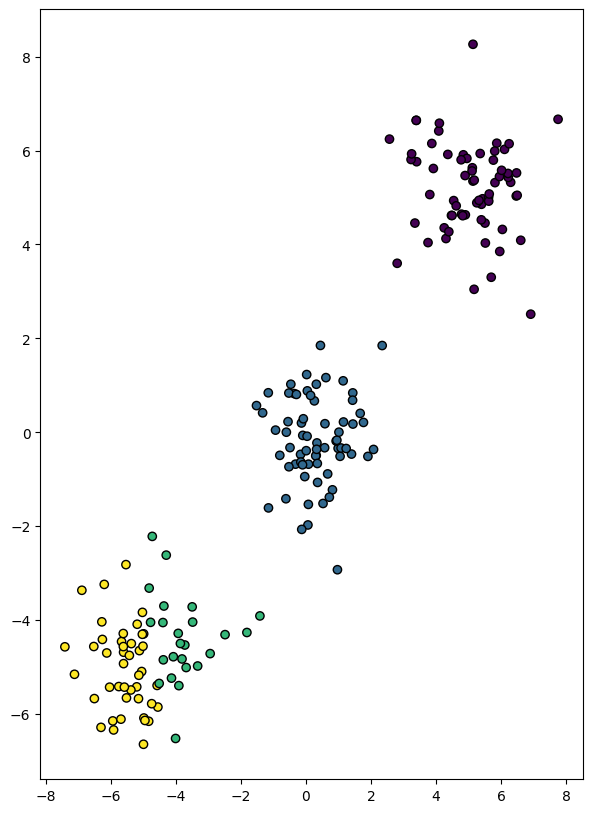

In [11]:
plt.figure(figsize=(7 , 10))
plt.scatter(x , y  , c=affinity_propagation_labels , cmap='viridis' , marker='o' , edgecolors='k' )

### Mean-Shift Clustering

In [12]:
Mean_Shift = MeanShift(bandwidth=6)
Mean_Shift.fit(X)
cluster_centers = Mean_Shift.cluster_centers_
ms_label= Mean_Shift.predict(X)

In [13]:
fig = go.Figure(data=go.Scatter(x=x,y=y , mode='markers' , marker=dict(color=ms_label , size=5)))
fig.update_layout(title='Make_blob dataset with Mean Shift')
fig.show()

### Spectral Clustering

In [14]:
spectral_clustering = SpectralClustering(n_clusters=8 , eigen_solver=None , affinity='rbf' , random_state=42)

In [15]:
sc_label = spectral_clustering.fit_predict(X)

In [16]:
fig = go.Figure(data=go.Scatter(x=x,y=y , mode='markers' , marker=dict(color=sc_label , size=5)))
fig.update_layout(title='Make_blob dataset with Spectral Clustering')
fig.show()

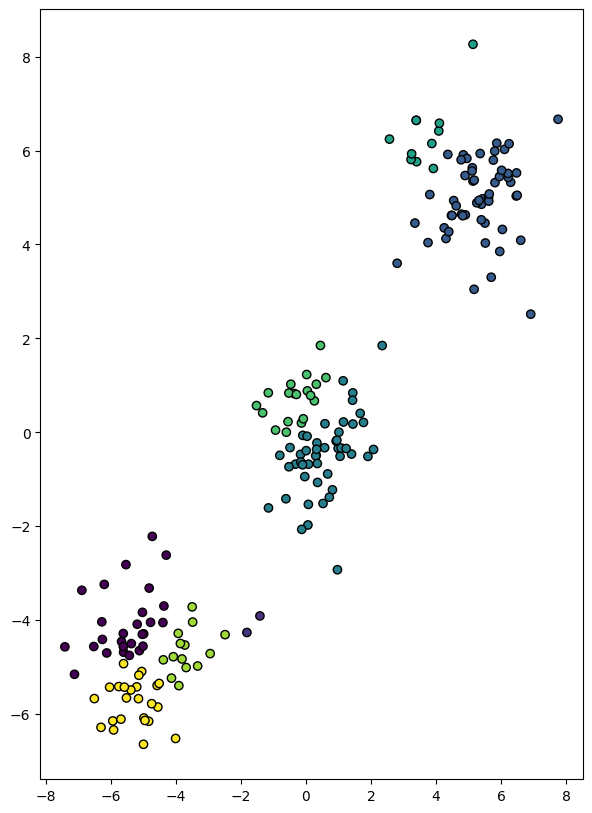

In [17]:
plt.figure(figsize=(7 , 10))
plt.scatter(x , y  , c=sc_label , cmap='viridis' , marker='o' , edgecolors='k' )

### AgglomerativeClustering (Hierarchical Clustering)

In [18]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=8 , linkage='ward')

In [19]:
hc_label = hierarchical_clustering.fit_predict(X)

In [20]:
fig = go.Figure(data=go.Scatter(x=x,y=y , mode='markers' , marker=dict(color=hc_label , size=5)))
fig.update_layout(title='Make_blob dataset with Hierarchical Clustering')
fig.show()

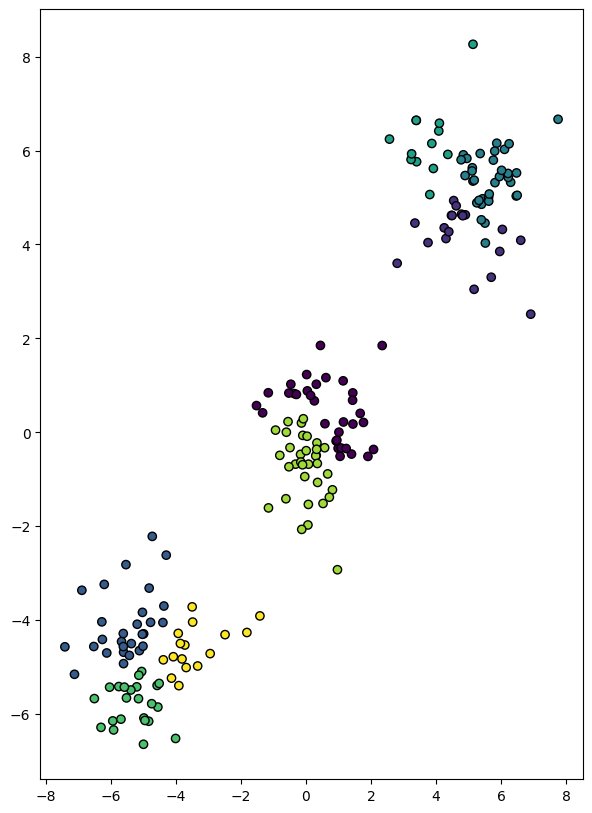

In [21]:
plt.figure(figsize=(7 , 10))
plt.scatter(x , y  , c=hc_label , cmap='viridis' , marker='o' , edgecolors='k' )

### DBSCAN

In [44]:
dbscan = DBSCAN(eps=2 , min_samples=5 , metric='euclidean')

In [45]:
db_label = dbscan.fit_predict(X)

In [46]:
fig = go.Figure(data=go.Scatter(x=x,y=y , mode='markers' , marker=dict(color=db_label , size=5)))
fig.update_layout(title='Make_blob dataset with DBSCAN')
fig.show()

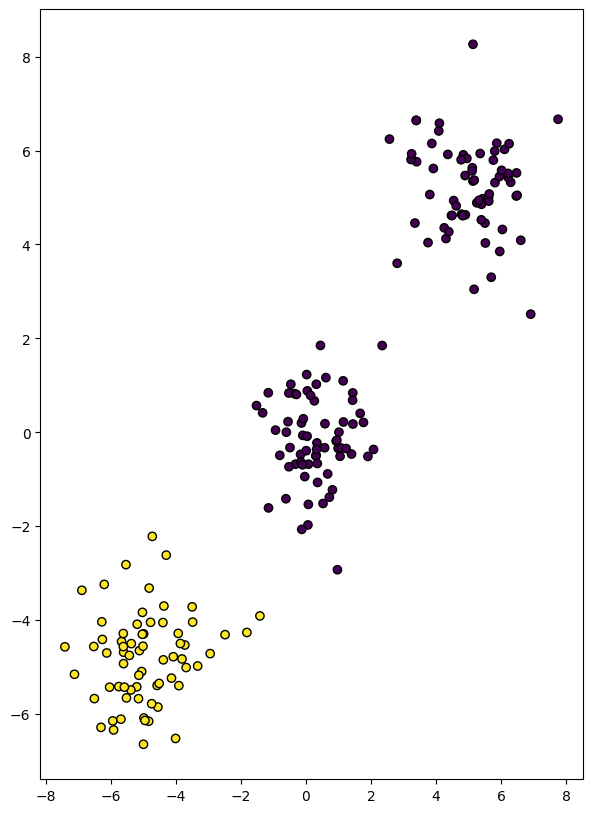

In [47]:
plt.figure(figsize=(7 , 10))
plt.scatter(x , y  , c=db_label , cmap='viridis' , marker='o' , edgecolors='k' )

### Optics

In [52]:
optics = OPTICS(min_samples=5 ,  xi=0.05, min_cluster_size=0.05)
optics_labels = optics.fit_predict(X)

In [53]:
fig = go.Figure(data=go.Scatter(x=x,y=y , mode='markers' , marker=dict(color=optics_labels , size=5)))
fig.update_layout(title='Make blob dataset with Optics')
fig.show()

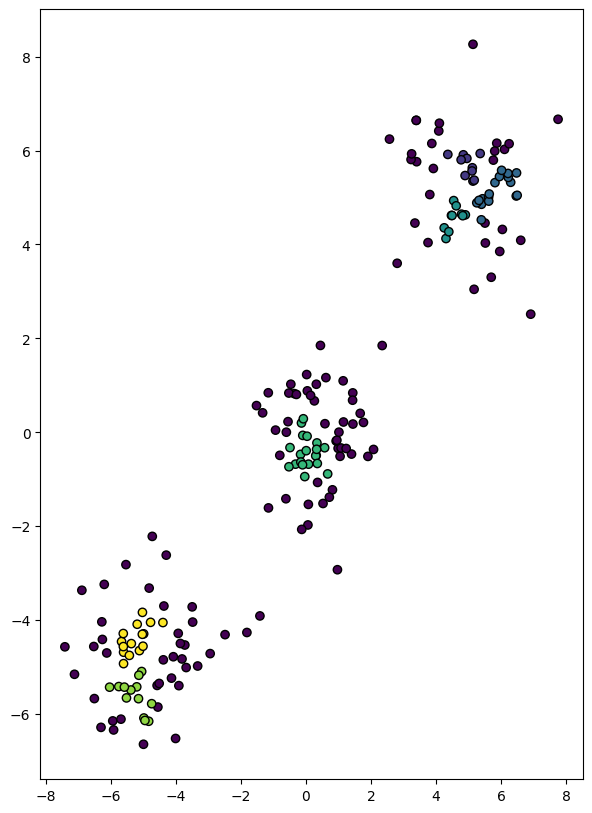

In [54]:
plt.figure(figsize=(7 , 10))
plt.scatter(x , y  , c=optics_labels , cmap='viridis' , marker='o' , edgecolors='k' )